# Homework 10: Group 1
#### Random Forest (Washington DC Bikeshare data)

David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

_____

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
rand_state = 1000

In [3]:
df=pd.read_csv('bikeshare.csv')

In [4]:
df.head(10)

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1
5,1,0,1,5,0,6,1,2,-1.334609,0.636351,-0.821460,2011-01-01,1
6,1,0,1,6,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,2
7,1,0,1,7,0,6,1,1,-1.542341,1.206507,-1.553844,2011-01-01,3
8,1,0,1,8,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,8
9,1,0,1,9,0,6,1,1,-0.919146,0.688184,-1.553844,2011-01-01,14


In [5]:
for col in df.columns:
    print(col, df[col].nunique())

season 4
yr 2
mnth 12
hr 24
holiday 2
weekday 7
notbizday 2
weathersit 4
temp 50
hum 89
windspeed 30
dteday 731
cnt 869


In [6]:
df.info()
df.drop("dteday", axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.317279,1.425283,1.255429e-16,-3.753926e-18,-9.090171e-16,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,1.000000e+00,1.000000e+00,1.000000e+00,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477133e+00,-3.251072e+00,-1.553844e+00,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.152801e-01,-7.631212e-01,-6.996685e-01,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,0.000000,1.000000,1.564651e-02,1.436357e-02,3.189788e-02,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.465731e-01,7.918483e-01,5.198813e-01,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.612292e+00,1.932159e+00,5.399715e+00,977.000000


In [8]:
from sklearn.preprocessing import OrdinalEncoder


In [9]:
ordinal_categorical = ["season" , "mnth" , "hr" , "weekday"]
enc = OrdinalEncoder()
df[ordinal_categorical]= enc.fit_transform(df[ordinal_categorical])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  float64
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  float64
 3   hr          17379 non-null  float64
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  float64
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.6 MB


__________
## **Question 1: RF Regression**

In this exercise I want you to apply RF regression model to the bikeshare data set which is available on the GitHub folder for HW10. From HW-7 KNN (Washington DC Bikeshare data)  we are already familiar with this data set so there is no need to do an EDA. The data are 17379 observations of hourly counts from 2011 to 2012 for bike rides (rentals) from the Capital Bikeshare system in Washington DC. It was originally compiled by Fanaee and Gama in ‘Event labeling combining ensemble detectors and background knowledge’ (2013).
Import the bikeshare.csv as a data frame and name it df.

1. Define your feature space and target variables. Split the data into test (30%) and train set (70%)

In [11]:
# Defining our target variable and the features and splitting the dataset into train and test:
y = df['cnt']
X = df.drop('cnt', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=rand_state)

In [12]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed
2243,1.0,0,3.0,8.0,0,5.0,0,3,-0.815280,1.258339,-0.211685
17261,0.0,1,11.0,2.0,0,4.0,0,2,-1.334609,1.258339,2.106440
435,0.0,0,0.0,4.0,0,4.0,0,1,-1.230743,-0.348463,-0.211685
785,0.0,0,1.0,4.0,0,6.0,1,3,-1.438475,1.569333,-0.456086
6360,3.0,0,8.0,14.0,0,2.0,0,2,0.950439,0.843681,-0.699669


2. From sklearn.ensemble import the relevant function for RF regression. Do the followings: 
    1. Train the model with the default features. However use random_state=1000.
    2. Make predictions on the test set and save them as y_hat 
    3. Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part 
    4. Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model? 
    5. Report the R-squared and RMSE_test for the RFF regression model. 

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [16]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)

In [17]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,21.38
4418,47,64.21
7141,11,4.91
14765,205,199.84
16541,65,80.55


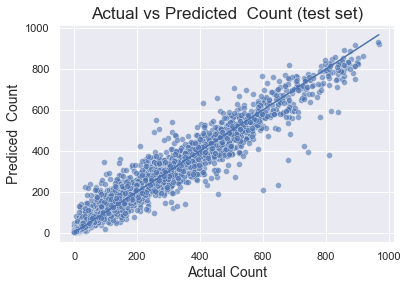

In [18]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual Count', fontsize=14)
plt.ylabel('Prediced  Count', fontsize=14)
plt.title('Actual vs Predicted  Count (test set)', fontsize=17)
plt.show()

- We are satisfied with the model. There are a few outliers but we are not concerned with them beucase they are a small portion of the total observations. 

In [19]:
np.round(RF_regression.score(X_test, y_test),4)

0.9488

In [20]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

41.82

- The R^2 for this model is 94.88% while the RMSE_test is 41.82. 

3. Tuning hyperparameters: I specifically want you to use the following param_grid. my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]} . Where you able to improve the model performance? Is random forest using a small tree or bushy tree? How do yo know?

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [23]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.0s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.1s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.1s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [25]:
grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [26]:
grid.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=1000)

In [27]:
y_hat_optimized = grid.predict(X_test)

In [28]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4495,26,21.38,21.100
4418,47,64.21,64.585
7141,11,4.91,4.905
14765,205,199.84,200.480
16541,65,80.55,76.010


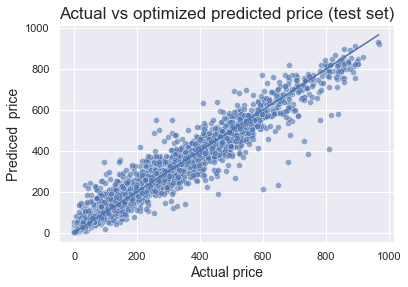

In [29]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [30]:
np.round(grid.score(X_test, y_test),4)

0.9487

In [31]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

41.85

- The r^2 for the optimized model is 94.87 and the RMSE is 41.85. This pervious r^2 was 94.88 RMSE was 41.82. Both of the optimized values are less than the original values by a small margin.

- This is a very bushy tree, showing that this could be suffering from overfitting.

4. Cross validation and OOB observations: estimate the R2 of the test set using both CV and OOB methods and compare the results.

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [34]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.9368

In [35]:
np.random.choice (100,size=100)

array([24, 62, 17, 56, 65, 15, 76, 30, 73, 60, 48, 78, 53, 43, 64,  4, 36,
       84, 68, 76, 59,  0, 62,  8, 59, 66, 48, 53, 34, 15, 64, 84,  5,  1,
       30, 16, 40, 33, 98, 23,  9, 97, 46, 83, 94, 25, 53,  0, 91, 71, 91,
       38,  5, 94, 18, 42, 12, 73, 28, 96, 51, 29, 77, 90, 55, 59, 81, 37,
       84, 25, 76,  3, 78, 35, 86, 71, 82, 99, 11, 30, 27, 11, 78, 59, 25,
        6, 57, 90, 99, 48, 43, 24, 88, 76, 80, 50,  4, 82, 90, 54])

In [36]:
np.unique(np.random.choice (100,size=100)).size

60

In [37]:
RF_oob = RandomForestRegressor(max_depth=None, max_features='auto', n_estimators=200, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [38]:
RF_oob.oob_score_

0.9398893170544532

- We were not able to improve the R^2 but it stayed relatively close to the unoptimized values. The R^2 for the CV is 93.69% while the R^2 for the OOB is 93.96%. This shows that the OOB method is a better tool to use. 

5. Feature importance: Plot the feature importance graph and compare your top 5 important features with the top 5 most significant variables derived from a linear regression model.  Can you name a variable which was important according to RF but not significant according to linear regression model? What's going on here?

In [39]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [40]:
RF_Regressor = RandomForestRegressor(n_estimators = 200, max_features='auto', max_depth= None, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1000)

In [41]:
importance = RF_Regressor.feature_importances_
importance

array([0.02061708, 0.07875192, 0.0167301 , 0.61011811, 0.00276799,
       0.01555165, 0.05776135, 0.0189977 , 0.13531001, 0.03192158,
       0.01147249])

In [42]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.002768
10,windspeed,0.011472
5,weekday,0.015552
2,mnth,0.016730
7,weathersit,0.018998
0,season,0.020617
9,hum,0.031922
6,notbizday,0.057761
1,yr,0.078752
8,temp,0.135310


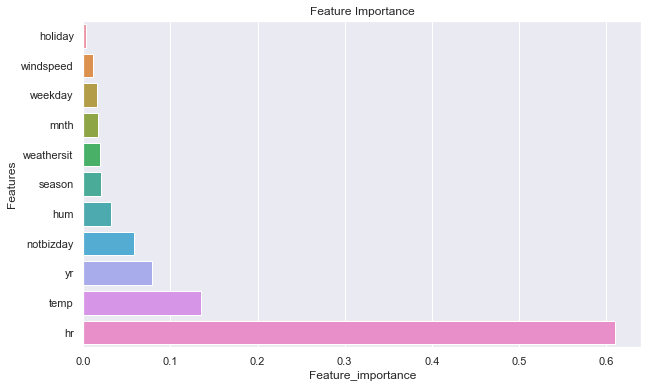

In [43]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

In [44]:
import statsmodels.api as sm

In [45]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [46]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [47]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     691.2
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:20:54   Log-Likelihood:                -77471.
No. Observations:               12165   AIC:                         1.550e+05
Df Residuals:                   12153   BIC:                         1.551e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8880      5.155      6.767      0.000      24.782      44.994
season        19.3442      2.114      9.149      0.000      15.199      23.489
yr            80.3554      2.576     31.191      0.000      75.306      85.405
mnth           0.0406      0.658      0.062      0.951      -1.249       1.330
hr             7.4540      0.196     38.014      0.000       7.070       7.838
holiday      -23.9886      7.879     -3.045      0.002     -39.432      -8.545
weekday        1.7031      0.643      2.649      0.008       0.443       2.964
notbizday     -2.4919      2.857     -0.872      0.383      -8.093       3.109
weathersit    -3.5995      2.274     -1.583      0.113      -8.057       0.858
temp          54.3312      1.378     39.424      0.000      51.630      57.033
hum          -37.7405      1.578    -23.919      0.000     -40.833     -34.648
windspeed      4.7366      1.362      3.477      0.001       2.066       7.407
==============================================================================
Omnibus:                     2452.232   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.463
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       4.893   Cond. No.                         91.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'Nonbizday' is in the top five in the random forest model but it is not statistically significant in the linear regression model. This is becuase 'nonbizday' could be a non linear function, 
RF automatically captures nonlinear variables while the OLS regression does not. 

_________
## **Question 2: RF Classification**

The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads. Do the followings

In [48]:
from sklearn.linear_model import LogisticRegression
from random import sample

In [49]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10, class_weight='balanced_subsample')

1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced?

In [50]:
df["overload"] = np.where(df["cnt"] > 500, 1, 0)

In [51]:
df.drop("cnt", axis=1, inplace=True)

In [52]:
# first we look at target variable proportions:
pd.crosstab(df['overload'],df['overload'])

overload,0,1
overload,,
0,16100,0
1,0,1279


In [53]:
# df_vis = df

In [54]:
# df.info()

In [55]:
#df_vis.loc[df_vis['overload']==1,].head()

In [56]:
#sample(list(df_vis.loc[df_vis['overload']==0,].index),5)

In [57]:
##overloads_only     = sample(list(df_vis.loc[df_vis['overload']==1,].index),1279)
#non_overloads_only = sample(list(df_vis.loc[df_vis['overload']==0,].index),1600)
#df1 = df_vis.iloc[overloads_only,]
#df0 = df_vis.iloc[non_overloads_only,]

In [58]:
#df_vis = pd.concat([df1,df0]) 
#df_vis

In [59]:
# first we look at target variable proportions:
#pd.crosstab(df_vis['overload'],df_vis['overload'])

In [60]:
# first we look at target variable proportions:
#pd.crosstab(df_vis['overload'],df_vis['overload'], normalize=True)*100

- Our data is very imbalanced, but this is to be expected. It is not very often that we woud expect 500 bikes to be rented in any one hour. To balance the data we set the class weight to "balanced_subsample".

2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%

In [61]:
y = df['overload']
X = df.drop('overload', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [62]:
X_train.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed
2243,1.0,0,3.0,8.0,0,5.0,0,3,-0.815280,1.258339,-0.211685
17261,0.0,1,11.0,2.0,0,4.0,0,2,-1.334609,1.258339,2.106440
435,0.0,0,0.0,4.0,0,4.0,0,1,-1.230743,-0.348463,-0.211685
785,0.0,0,1.0,4.0,0,6.0,1,3,-1.438475,1.569333,-0.456086
6360,3.0,0,8.0,14.0,0,2.0,0,2,0.950439,0.843681,-0.699669


3. From sklearn.ensemble import the relevant function for RF classification. Do the followings: (25 points)
    1. Train the RF classification model using its default parameters. However use random_state=1000.
    2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.
    3. Plot the histogram of y_hat_probs? Explain what you see? Is there a probability threshold at which the model always predict negative or positive?
    4. Use the built-in classification report function from sklearn. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why?

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [92]:
# Fitting RF classifier to the Training set

RF_classifier = RandomForestClassifier(class_weight='balanced_subsample')
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample')

In [93]:
# Predicting the Test set probabilities and classes
y_hat      = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. 

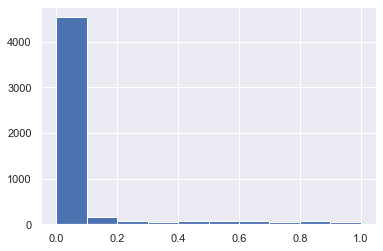

In [94]:
plt.hist(y_hat_probs)
plt.show()

In [95]:
y_hat_0 = np.where(y_hat_probs>0,1,0)
y_hat_1 = np.where(y_hat_probs>1,1,0)

In [96]:
df_predictions2 = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_0':y_hat_0, 'y_hat_1': y_hat_1})
df_predictions2.head()

,y_test,y_hat_probs,y_hat_0,y_hat_1
4495,0,0.00,0,0
4418,0,0.00,0,0
7141,0,0.00,0,0
14765,0,0.01,1,0
16541,0,0.00,0,0


In [97]:
print(confusion_matrix(y_test, y_hat_0))

[[3057 1762]
 [   2  393]]


In [98]:
print(confusion_matrix(y_test, y_hat_1))

[[4819    0]
 [ 395    0]]


- At the threshold 100% it will always predict nonoverload

In [99]:
print(confusion_matrix(y_test, y_hat))

[[4786   33]
 [ 112  283]]


In [100]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.90      0.72      0.80       395

    accuracy                           0.97      5214
   macro avg       0.94      0.85      0.89      5214
weighted avg       0.97      0.97      0.97      5214



- We do trust these statistics because we have balanced the data and dropped the 'cnt' variable to ensure the model isn't able to cheat.
- The confusion matrix shows that there is a small amount of error in our model but the majority is being classified correctly. The precision score, recall score, F1 score of show that the model is quite accurate but also has some errors in prediction. Any scores of 1 would be suspicious so we are happy with the accuracy of this model based on our scores.


4. Tuning hyperparameters: I specifically want you to use the following param_grid. my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]} . Where you able to improve the model performance? Is random forest using a small tree or bushy tree? How do yo know?

In [74]:
y_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [103]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   26.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [78]:
grid.best_params_

{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}

In [79]:
grid.best_estimator_

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=1000)

In [80]:
y_hat_optimized = grid.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_hat_optimized))

[[4784   35]
 [ 113  282]]


In [82]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4819
           1       0.89      0.71      0.79       395

    accuracy                           0.97      5214
   macro avg       0.93      0.85      0.89      5214
weighted avg       0.97      0.97      0.97      5214



- This is a bushy tree because max_depth is none and there are no limitations on min_samples_leaf. We slightly improved the model specifically from a recall standpoint.

5. Cross validation and OOB observations: estimate the accuracy of the test set using both CV and OOB methods and compare the results. 

In [83]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

6. Dealing with imbalanced data: Use the balanced version of RF classifier and save the predictions as y_hat_balanced. Report the precision, recall and f1 score for the balanced RF versus what you found in part 3.4. What happened to recall? does that make sense?

In [84]:
print(confusion_matrix(y_test, y_hat_balanced))

[[4365  454]
 [  28  367]]


In [85]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4819
           1       0.45      0.93      0.60       395

    accuracy                           0.91      5214
   macro avg       0.72      0.92      0.78      5214
weighted avg       0.95      0.91      0.92      5214



7. Plot the ROC curve for the balanced RF and report the AUC. Can you trust this number now? why?

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.978


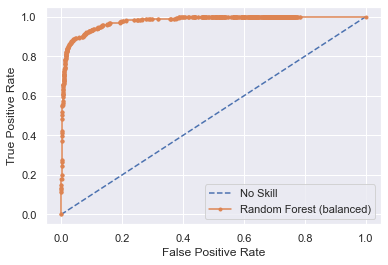

In [87]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Based on **AUC=.978**, the model is doing a better job compared to random prediction with no skill. We can trust this number because the data is balanced.

8. Feature importance: Plot the feature importance graph and report the top 5 important features. Is your finding consistent with common sense?

In [104]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [105]:
importance = RF_balanced.feature_importances_
importance

array([0.03477258, 0.16069217, 0.04836748, 0.44471493, 0.00353226,
       0.02952821, 0.04239218, 0.01319562, 0.12865137, 0.06820395,
       0.02594927])

In [106]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.003532
7,weathersit,0.013196
10,windspeed,0.025949
5,weekday,0.029528
0,season,0.034773
6,notbizday,0.042392
2,mnth,0.048367
9,hum,0.068204
8,temp,0.128651
1,yr,0.160692


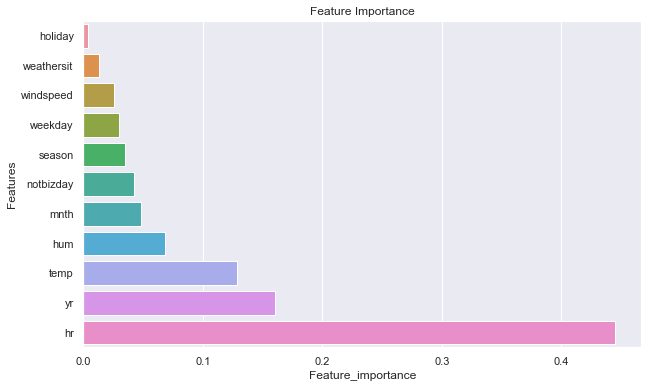

In [107]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()